# Read the dataset

In [1]:
import pandas as pd
df=pd.read_csv('IMDB Dataset.csv')

# EDA

In [2]:
print(df.shape)

(50000, 2)


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:
p = df[df['sentiment']=='positive'][:25000] 
n = df[df['sentiment']=='negative'][:25000]

new = pd.concat([p,n],axis=0)
new.shape

new['sentiment'].value_counts()

df = new

In [6]:
df.head(1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [7]:
print(df['sentiment'].value_counts())

sentiment
positive    10000
negative    10000
Name: count, dtype: int64


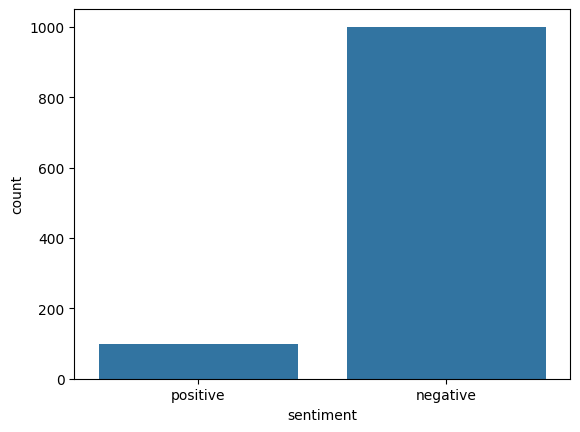

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='sentiment',data=df)
plt.show()

In [41]:
positive_review=list(df[df['sentiment']=='positive']['review'])[:1000]
negative_review=list(df[df['sentiment']=='negative']['review'])[:1000]

In [42]:
print(len(positive_review))

100


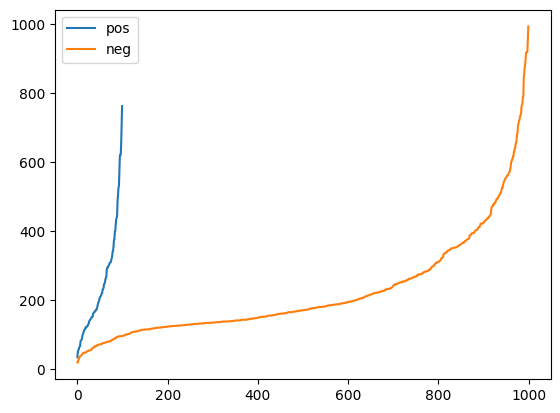

In [43]:
# word count

charlen_pos = []
for i in positive_review:
    charlen_pos.append(len(i.split()))

charlen_neg = []
for i in negative_review:
    charlen_neg.append(len(i.split()))

import matplotlib.pyplot as plt
charlen_pos.sort()
charlen_neg.sort()
plt.plot(range(len(charlen_pos)),charlen_pos)
plt.plot(range(len(charlen_neg)),charlen_neg)
plt.legend(['pos','neg'])
plt.show()

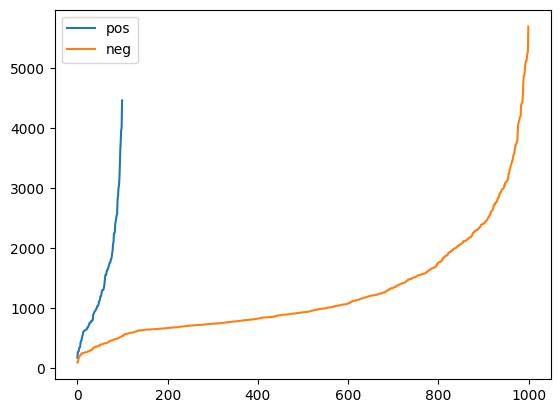

In [44]:
 # word count

charlen_pos = []
for i in positive_review:
    charlen_pos.append(len(i))

charlen_neg = []
for i in negative_review:
    charlen_neg.append(len(i))

import matplotlib.pyplot as plt
charlen_pos.sort()
charlen_neg.sort()
plt.plot(range(len(charlen_pos)),charlen_pos)
plt.plot(range(len(charlen_neg)),charlen_neg)
plt.legend(['pos','neg'])
plt.show()

In [45]:
# pip install wordcloud

In [10]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 
stopwords=set(STOPWORDS)

In [47]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

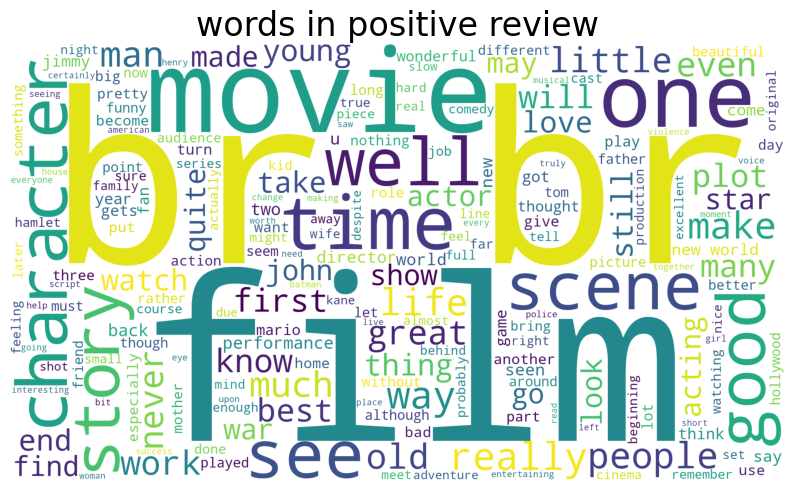

In [48]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

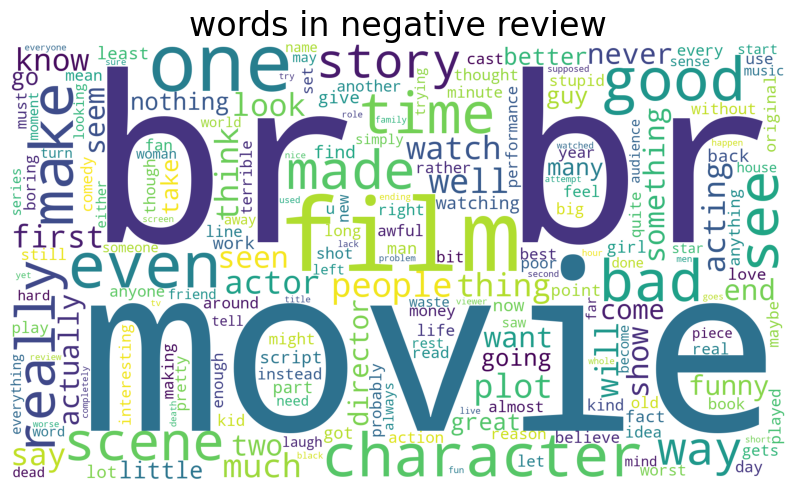

In [49]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

# Cleaning 

In [11]:

from tqdm import tqdm
def text_processing(data,colum_name):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above sentence,
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data[colum_name].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in preprocessed_reviews:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

In [12]:
x=text_processing(df,'review')

  0%|          | 0/20000 [00:00<?, ?it/s]

  2%|▏         | 401/20000 [00:00<00:04, 4004.15it/s]/var/folders/nf/r4jgw26163j0xgqlgstm67r80000gn/T/ipykernel_74844/986484085.py:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentance = BeautifulSoup(sentance, 'lxml').get_text()
100%|██████████| 20000/20000 [00:04<00:00, 4620.66it/s]


In [13]:
df = df

In [14]:
df['cleaned_review']=x

In [15]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...
5,"Probably my all-time favorite movie, a story o...",positive,"probabl all-tim favorit movie, stori selflessn..."


In [16]:
X = df['cleaned_review']
Y = df['sentiment']

In [17]:
Y = list(Y)
for i in range(len(Y)):
    if Y[i]=='positive':
        Y[i]=1
    else:
        Y[i]=0
        
df['sentiment_score']=Y

Y=df['sentiment_score']

# Prepare the data for the ML model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14000,) (6000,) (14000,) (6000,)


In [21]:
print(y_train.value_counts())

sentiment_score
1    7010
0    6990
Name: count, dtype: int64


# BOW

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print('The top words used',vectorizer.get_feature_names_out())
print('type of bow',type(X_train_bow))
print('Matrix representation',X_train_bow.toarray()[:1])
print('shape',X_train_bow.shape,X_test_bow.shape)

The top words used ['aaliyah' 'aamir' 'aardman' ... 'zoo' 'zoom' 'zorro']
type of bow <class 'scipy.sparse._csr.csr_matrix'>
Matrix representation [[0 0 0 ... 0 0 0]]
shape (14000, 10000) (6000, 10000)


In [24]:
print('Before smote traning',list(y_train).count(1),list(y_train).count(0))
print('Before smote test',list(y_test).count(1),list(y_test).count(0))

Before smote traning 7010 6990
Before smote test 2990 3010


In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_bow, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_bow, y_test)

In [26]:
print('After smote traning',list(y_train_resampled).count(1),list(y_train_resampled).count(0))
print('After smote test',list(y_test_resampled).count(1),list(y_test_resampled).count(0))

After smote traning 7010 7010
After smote test 3010 3010


# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  # f1_score

accuracy_train_list = []
accuracy_test_list = []
# f1_train_list =[]
# f1_test_list=[]

for i in range(61,71,4):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(X_train_resampled, y_train_resampled)
    
    # Test the training data
    y_pred_train = neigh.predict(X_train_bow)

    accuracy_train = accuracy_score(y_pred_train,y_train)
    
    accuracy_train_list.append(accuracy_train)
    # f1_train = f1_score(y_pred_train,y_train)
    # f1_train_list.append(f1_train)
   
    # Test the test data
    y_pred_test = neigh.predict(X_test_bow)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    accuracy_test_list.append(accuracy_test)
    # f1_test = f1_score(y_pred_test,y_test)
    # f1_test_list.append(f1_test)
   
    print(accuracy_train,accuracy_test)
    # print(f1_train,f1_test)
    print()
    
    
  
# overfit (risky unstable)
# train - 90
# test - 70

# test - 55

# ideal both the value are close ( stable)
# train- 75
# test - 68

# test - 65



K 61
0.7492857142857143 0.6998333333333333

K 65
0.7527142857142857 0.7001666666666667

K 69
0.752 0.7041666666666667



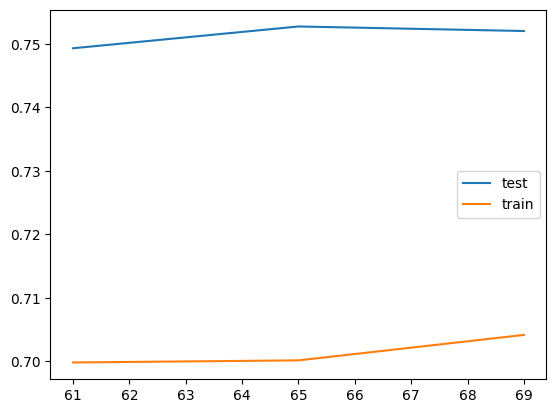

In [32]:
import matplotlib.pyplot as plt
plt.plot(list(range(61,71,4)),accuracy_train_list)
plt.plot(list(range(61,71,4)),accuracy_test_list)
plt.legend(['test','train'])
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
    
# initialization
neigh = KNeighborsClassifier(n_neighbors=65)

# Training
neigh.fit(X_train_resampled, y_train_resampled)

# Test the training data
y_pred_train = neigh.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = neigh.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)


print(accuracy_train,accuracy_test)
print(f1_test,f1_test)

0.7527142857142857 0.7001666666666667
0.7111895970460748 0.7111895970460748


In [139]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
# print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

     Postive       1.00      0.90      0.95       770
    Negative       0.00      0.00      0.00         0

    accuracy                           0.90       770
   macro avg       0.50      0.45      0.47       770
weighted avg       1.00      0.90      0.95       770



C:\Users\Smritik Sadhukhan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Smritik Sadhukhan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Smritik Sadhukhan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
c

array([[696,  74],
       [  0,   0]], dtype=int64)

<AxesSubplot:>

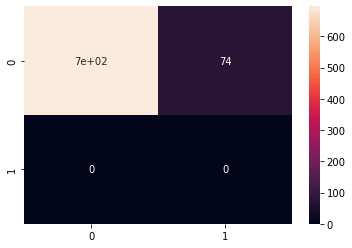

In [142]:
import seaborn as sns
sns.heatmap(c, annot=True)

In [ ]:
# random search cv
# grid search cv

# hyperparameter 

In [117]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(10,30,2))}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train_bow, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26,
                                         28]})

In [118]:
clf.best_params_

{'n_neighbors': 28}

In [121]:
neigh = KNeighborsClassifier(n_neighbors=10, p=2)
neigh.fit(X_train_bow, y_train)

y_pred_train = clf.predict(X_train_bow)
f1_train = f1_score(y_pred_train,y_train)
print(f1_train)
print(classification_report(y_pred_train, y_train, target_names=target_names))

0.7083775185577942
              precision    recall  f1-score   support

     Postive       0.27      0.76      0.40       120
    Negative       0.92      0.58      0.71       580

    accuracy                           0.61       700
   macro avg       0.60      0.67      0.55       700
weighted avg       0.81      0.61      0.66       700



In [122]:
y_pred_test = clf.predict(X_test_bow)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=target_names))

0.6272493573264781
              precision    recall  f1-score   support

     Postive       0.20      0.67      0.31        49
    Negative       0.88      0.49      0.63       251

    accuracy                           0.52       300
   macro avg       0.54      0.58      0.47       300
weighted avg       0.77      0.52      0.58       300



In [ ]:
>>> from sklearn.naive_bayes import GaussianNB


f1-score (unbalanced) - precision and recall 

2(p*r)/p+r

p - 

TP - True postive - point which are actually  postive and  predicted as positive
FP - false positive - point which are actually negative but pred as postive
TN - True negative  - point which are actually  negative and  predicted as negative
FN -  false negative  - point which are actually postive but pred as negative

positive(precision)-  TP/FP+TP = 40/40  - 1 - Precision - out of all the predicted postive point how many are actually postive
negative(precision) - 50/10+50 = 0.84

positive(recall) - Tp/p = 40/50 - 0.8
negative(recall) - 50/50 = 1 


100 - 50 p 
50 n

40 p 
60 n

In [ ]:
pos 25000   

neg  100 - 25000

unbalanced 

SMOTE - Synthetic Minority Oversampling Technique

